In [2]:
from BorderModel import BorderData, clean_df_subset
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from dbhelper import pd_query
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV

In [27]:
query = '''
        select 
            m.date,
            metric as waittime,
            year,
            month,
            week,
            dayofweek,
            minofday,
            w.temp_max,
            w.temp_mean,
            w.temp_min,
            w.viz_max,
            w.wind_max,
            w.precip,
            w.rain,
            w.snow,
            w.fog,
            w.thunderstorm,
            wp1.temp_max as temp_max_p1,
            wp1.temp_mean as temp_mean_p1,
            wp1.temp_min as temp_min_p1,
            wp1.precip as precip_p1,
            wp1.rain as rain_p1,
            wp1.snow as snow_p1,
            wp1.thunderstorm as thunderstorm_p1,
            wp2.temp_max as temp_max_p2,
            wp2.temp_mean as temp_mean_p2,
            wp2.temp_min as temp_min_p2,
            wp2.precip as precip_p2,
            wp2.rain as rain_p2,
            wp2.snow as snow_p2,
            wp2.thunderstorm as thunderstorm_p2,
            wp3.temp_max as temp_max_p3,
            wp3.temp_mean as temp_mean_p3,
            wp3.temp_min as temp_min_p3,
            wp3.precip as precip_p3,
            wp3.rain as rain_p3,
            wp3.snow as snow_p3,
            wp3.thunderstorm as thunderstorm_p3,
            wm1.temp_max as temp_max_m1,
            wm1.temp_mean as temp_mean_m1,
            wm1.temp_min as temp_min_m1,
            wm1.precip as precip_m1,
            wm1.rain as rain_m1,
            wm1.snow as snow_m1,
            wm1.thunderstorm as thunderstorm_m1,
            wm2.temp_max as temp_max_m2,
            wm2.temp_mean as temp_mean_m2,
            wm2.temp_min as temp_min_m2,
            wm2.precip as precip_m2,
            wm2.rain as rain_m2,
            wm2.snow as snow_m2,
            wm2.thunderstorm as thunderstorm_m2,
            s.event,
            s_lead1.event as event_lead1,
            s_lag1.event as event_lag1,
            s_lead2.event as event_lead2,
            s_lag2.event as event_lag2,
            s_lead3.event as event_lead3,
            s_lag3.event as event_lag3,
            s_lead4.event as event_lead4,
            s_lag4.event as event_lag4,
            sch.district as sd,
            sch_lag1.district as sd_lag1,
            sch_lead1.district as sd_lead1,
            sch_lag2.district as sd_lag2,
            sch_lead2.district as sd_lead2,
            sch_lag3.district as sd_lag3,
            sch_lead3.district as sd_lead3
        from mungedata m
        join datefeatures d on m.date = d.date
        left join publicholiday h on m.date::timestamp::date = h.date
        left join weather w on m.date::timestamp::date = w.date
        left join weather wp1 on m.date::timestamp::date = wp1.date - interval '1 day'
        left join weather wp2 on m.date::timestamp::date = wp2.date - interval '2 day'
        left join weather wp3 on m.date::timestamp::date = wp3.date - interval '3 day'
        left join weather wm1 on m.date::timestamp::date = wm1.date + interval '1 day'
        left join weather wm2 on m.date::timestamp::date = wm2.date + interval '2 day'
        left join specialdates s on m.date::timestamp::date = s.date
        left join specialdates s_lead1 on m.date::timestamp::date = s_lead1.date - interval '1 day'
        left join specialdates s_lag1 on m.date::timestamp::date = s_lag1.date + interval '1 day'
        left join specialdates s_lead2 on m.date::timestamp::date = s_lead2.date - interval '2 day'
        left join specialdates s_lag2 on m.date::timestamp::date = s_lag2.date + interval '2 day'
        left join specialdates s_lead3 on m.date::timestamp::date = s_lead3.date - interval '3 day'
        left join specialdates s_lag3 on m.date::timestamp::date = s_lag3.date + interval '3 day'
        left join specialdates s_lead4 on m.date::timestamp::date = s_lead4.date - interval '4 day'
        left join specialdates s_lag4 on m.date::timestamp::date = s_lag4.date + interval '4 day'
        left join schoolcalendar sch on m.date::timestamp::date = sch.date_out 
        left join schoolcalendar sch_lag1 on m.date::timestamp::date = sch.date_out + interval '1 day'
        left join schoolcalendar sch_lead1 on m.date::timestamp::date = sch_lead1.date_out - interval '1 day'
        left join schoolcalendar sch_lag2 on m.date::timestamp::date = sch_lag2.date_out + interval '2 day'
        left join schoolcalendar sch_lead2 on m.date::timestamp::date = sch_lead2.date_out - interval '2 day'
        left join schoolcalendar sch_lag3 on m.date::timestamp::date = sch_lag3.date_out + interval '3 day'
        left join schoolcalendar sch_lead3 on m.date::timestamp::date = sch_lead3.date_out - interval '3 day'
        where
            crossing_id = 1
            and m.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
            and is_waittime = true
        order by m.date;
        '''

df = pd_query(query)

In [28]:
from BorderModel import BorderData
data = BorderData(df, categoricals=['event', 'sd'])

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.995845356852
Best score:  -0.0286762728384
** MSE for last cv fold **
Baseline :  117.048333971
Model    :  124.750663131
** R^2 for last cv fold **
Baseline :  0.286162059509
Model    :  0.239188176174
** Explained variance for last cv fold **
Baseline :  0.43812843759
Model    :  0.369250311962


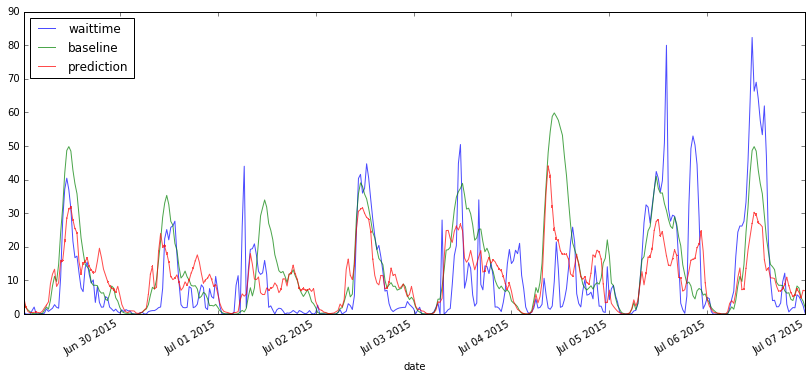

In [29]:
data.plot('6/29/15', '7/7/15');

In [30]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'year' 'dayofweek' 'week' 'month' 'event_lag2_xmas'
 'temp_max_p2' 'temp_max_p3' 'event_lead2_civic' 'wind_max' 'temp_max_m2'
 'temp_min' 'temp_max_p1' 'rain_p3' 'temp_max_m1' 'temp_min_m2'
 'temp_min_m1' 'temp_min_p1' 'rain_p2' 'temp_mean' 'temp_mean_m2'
 'temp_max' 'rain_m1' 'temp_min_p3' 'temp_mean_p2' 'temp_min_p2'
 'temp_mean_p3' 'rain' 'temp_mean_p1' 'temp_mean_m1' 'rain_m2' 'rain_p1'
 'event_xmas' 'precip_p1' 'precip' 'precip_p3' 'fog' 'precip_m1'
 'precip_p2' 'event_lead1_civic' 'event_lag4_civic' 'precip_m2'
 'event_lead2_newyears' 'event_lead2_labor' 'event_lead4_civic'
 'event_lead1_xmas' 'event_lag3_xmas' 'event_lead4_newyears'
 'event_lead3_labor' 'snow_p3' 'event_lag3_canada' 'event_civic'
 'event_independence' 'event_lag4_xmas' 'snow' 'event_lead3_newyears'
 'event_lead3_civic' 'event_lag2_independence' 'thunderstorm_m2'
 'thunderstorm_m1' 'event_lag1_xmas' 'event_lead3_independence'
 'event_goodfriday' 'event_canada' 'event_lag3_civic' 'event_lag1_newyears'


In [44]:
data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]\
    [np.array(sorted(grid.best_estimator_.feature_importances_)[::-1]) < .0001]  # ^^sorts^^ <<filters

array(['sd_lag2_seattle', 'sd_lag2_vancouver', 'viz_max', 'event_mlk',
       'event_thanksgiving', 'event_lag1_thanksgiving', 'sd_lead3_seattle',
       'event_lead4_veterans', 'event_lag3_thanksgiving',
       'event_lag1_veterans', 'event_lead2_goodfriday',
       'event_lead1_veterans', 'sd_lead2_seattle', 'event_lead2_halloween',
       'sd_lead1_seattle', 'event_lag2_thanksgiving',
       'event_lead3_victoria', 'event_lead1_ca_thanksgiving',
       'event_lag1_labor', 'event_lead3_president',
       'event_lead3_ca_thanksgiving', 'event_victoria',
       'event_lead2_memorial', 'event_lead3_veterans',
       'event_lead2_veterans', 'event_lead2_president',
       'event_lag2_veterans', 'event_halloween', 'event_lag3_veterans',
       'event_lag4_victoria', 'event_lead1_memorial',
       'event_lag3_newyears', 'event_lead1_mothers',
       'event_lag4_president', 'event_lead3_goodfriday',
       'event_lead3_memorial', 'event_lag2_labor', 'event_lag2_goodfriday',
       'event_le